In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
cars_data = pd.read_csv(r'C:\Users\WNasir\Desktop\datasets\Car_sale_ads.csv') 

In [4]:
cars_data.shape

(208304, 25)

Quite enough data for ML standards

In [5]:
cars_data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [7]:
cars_data.isna().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [8]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,208304.0,104151.500000,6.013233e+04,0.0,52075.75,104151.5,156227.25,2.083030e+05
Price,208304.0,63053.833714,8.665967e+04,500.0,17800.00,35700.0,75990.00,6.999000e+06
Production_year,208304.0,2012.098241,6.998414e+00,1915.0,2008.00,2013.0,2017.00,2.021000e+03
Mileage_km,207321.0,150276.763960,2.937447e+06,1.0,53000.00,144566.0,206000.00,1.111111e+09
Power_HP,207661.0,151.836281,7.768355e+01,1.0,105.00,136.0,172.00,1.398000e+03
Displacement_cm3,206338.0,1882.567147,7.296097e+02,400.0,1461.00,1798.0,1997.00,8.400000e+03
CO2_emissions,94047.0,319156.381107,7.291396e+07,1.0,120.00,140.0,164.00,2.000000e+10
Doors_number,206817.0,4.637138,7.685590e-01,1.0,5.00,5.0,5.00,5.500000e+01


Standard deviations are quite large, mean data is very much skewed

# Preprocessing other then numeric features

In [9]:
cars_data.select_dtypes(include='object').nunique()

Currency                        2
Condition                       2
Vehicle_brand                 108
Vehicle_model                1203
Vehicle_version             19056
Vehicle_generation            569
Fuel_type                       8
Drive                           5
Transmission                    2
Type                            9
Colour                         14
Origin_country                 37
First_owner                     1
First_registration_date      8441
Offer_publication_date         41
Offer_location              13635
Features                   177211
dtype: int64

* Take a bird's eye view on unique values

In [10]:
for label, content in cars_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        print(len(pd.unique(content)))
        print(pd.unique(content))
        print('*' * 100)

Currency
2
['PLN' 'EUR']
****************************************************************************************************
Condition
2
['New' 'Used']
****************************************************************************************************
Vehicle_brand
108
['Abarth' 'Acura' 'Aixam' 'Alfa Romeo' 'Alpine' 'Aston Martin' 'Audi'
 'Austin' 'Autobianchi' 'Baic' 'Bentley' 'BMW' 'Buick' 'Cadillac'
 'Casalini' 'Chatenet' 'Chevrolet' 'Chrysler' 'Citroën' 'Cupra' 'Dacia'
 'Daewoo' 'Daihatsu' 'DFSK' 'DKW' 'Dodge' 'DS Automobiles' 'FAW' 'Ferrari'
 'Fiat' 'Ford' 'Gaz' 'GMC' 'Grecav' 'Honda' 'Hummer' 'Hyundai' 'Infiniti'
 'Isuzu' 'Iveco' 'Jaguar' 'Jeep' 'Kia' 'Lada' 'Lamborghini' 'Lancia'
 'Land Rover' 'Lexus' 'Ligier' 'Lincoln' 'Lotus' 'MAN' 'Warszawa'
 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mercury' 'MG'
 'Microcar' 'MINI' 'Mitsubishi' 'Moskwicz' 'Nissan' 'NSU' 'Nysa'
 'Oldsmobile' 'Opel' 'Inny' 'Toyota' 'Tata' 'Uaz' 'Żuk' 'Trabant' 'Suzuki'
 'Volvo' 'Volkswagen' 'Su

9
['small_cars' 'coupe' 'city_cars' 'convertible' 'compact' 'SUV' 'sedan'
 'station_wagon' 'minivan']
****************************************************************************************************
Colour
14
['gray' 'silver' 'blue' 'black' 'white' 'red' 'yellow' 'other' 'green'
 'burgundy' 'golden' 'brown' 'beige' 'violet']
****************************************************************************************************
Origin_country
38
[nan 'Germany' 'Poland' 'France' 'Switzerland' 'United States' 'Austria'
 'Canada' 'Italy' 'Belgium' 'Netherlands' 'Denmark' 'Sweden'
 'Czech Republic' 'Other' 'Finland' 'Great Britain' 'Luxembourg'
 'Slovenia' 'Belarus' 'Spain' 'Hungary' 'Slovakia' 'Ireland' 'Norway'
 'Lithuania' 'Estonia' 'Greece' 'Latvia' 'Romania' 'Russia' 'Croatia'
 'Turkey' 'Ukraine' 'Iceland' 'Monaco' 'Bulgaria' 'Liechtenstein']
****************************************************************************************************
First_owner
2
[nan 'Yes']
*****************

* As the above cell shows that some features have too many unique values so it is quite impossible to encode them 
* Moreover some columns have extra information which make our model more complex
* So a better approach is to drop them before further preprocessing

creates a copy of data

In [11]:
new_data = cars_data.copy()

In [12]:
cols = ['Index', 'Vehicle_model', 'Vehicle_version', 'Vehicle_generation', 'Colour', 'Origin_country', 'First_registration_date',
       'Offer_publication_date', 'Offer_location', 'Features', 'First_owner']
for i in cols:
    new_data.drop(i, axis=1, inplace=True)

In [13]:
new_data.shape

(208304, 14)

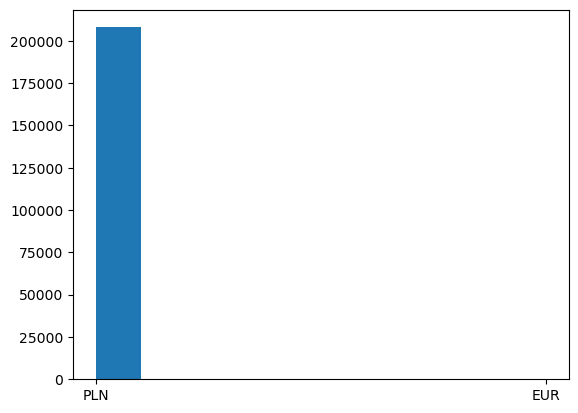

In [14]:
plt.hist(new_data['Currency'])
plt.show()

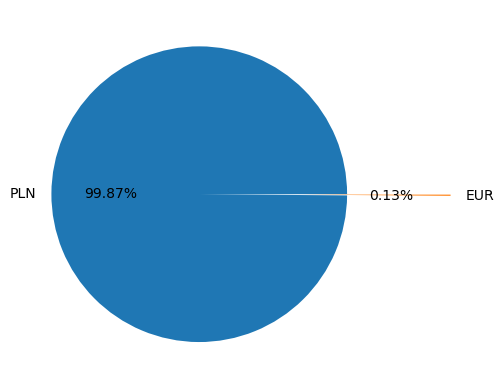

In [15]:
plt.pie(x=new_data['Currency'].value_counts(), labels=pd.unique(new_data['Currency']), autopct='%.2f%%', explode=[0, 0.7])
plt.show()

In [16]:
new_data.loc[new_data['Currency'] == 'EUR']

,Price,Currency,Condition,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number
141,18448,EUR,New,Aixam,2021,1.0,12.0,NaN,Electric,NaN,NaN,Automatic,small_cars,2.0
142,17731,EUR,New,Aixam,2021,1.0,12.0,NaN,Electric,NaN,NaN,Automatic,small_cars,2.0
143,14143,EUR,New,Aixam,2021,1.0,8.0,479.0,Diesel,NaN,NaN,Automatic,small_cars,2.0
144,13426,EUR,New,Aixam,2021,1.0,4.0,479.0,Diesel,NaN,NaN,Automatic,small_cars,2.0
152,9673,EUR,New,Aixam,2021,1.0,8.0,400.0,Diesel,NaN,NaN,Automatic,small_cars,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203703,28500,EUR,Used,Volvo,2017,18000.0,367.0,1969.0,Gasoline,149.0,NaN,Automatic,sedan,4.0
208176,18900,EUR,Used,Volvo,2015,115000.0,235.0,2000.0,Diesel,NaN,4x4 (permanent),Automatic,SUV,5.0
208205,7200,EUR,Used,Volvo,2017,54000.0,120.0,2000.0,Diesel,NaN,Front wheels,Manual,compact,5.0
208232,8900,EUR,Used,Volvo,2016,79000.0,163.0,2000.0,Diesel,NaN,Front wheels,Automatic,SUV,5.0


Prices are mentioned in either currency, we can drop those currencies mentioned in Euros or we can convert them into PLNs
and converting them is a good approach

In [17]:
new_data['Price_'] = new_data['Price'] * (new_data['Currency'].apply(lambda x: 1 if x == 'PLN' else 4.41))

In [18]:
4.41 * 18448

81355.68000000001

In [19]:

new_data['Price_'].loc[new_data['Currency'] == 'EUR']

141        81355.68
142        78193.71
143        62370.63
144        59208.66
152        42657.93
            ...    
203703    125685.00
208176     83349.00
208205     31752.00
208232     39249.00
208281     55125.00
Name: Price_, Length: 270, dtype: float64

Now drop the previous Price column and Currency column, because now they are useless

In [20]:
new_data.drop(['Price', 'Currency'], axis=1, inplace=True)

In [21]:
new_data.shape

(208304, 13)

What cars' brands our data have

In [22]:
new_data['Vehicle_brand'].unique()

array(['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', 'Aston Martin',
       'Audi', 'Austin', 'Autobianchi', 'Baic', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Casalini', 'Chatenet', 'Chevrolet', 'Chrysler',
       'Citroën', 'Cupra', 'Dacia', 'Daewoo', 'Daihatsu', 'DFSK', 'DKW',
       'Dodge', 'DS Automobiles', 'FAW', 'Ferrari', 'Fiat', 'Ford', 'Gaz',
       'GMC', 'Grecav', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'Lotus', 'MAN',
       'Warszawa', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mercury', 'MG', 'Microcar', 'MINI', 'Mitsubishi',
       'Moskwicz', 'Nissan', 'NSU', 'Nysa', 'Oldsmobile', 'Opel', 'Inny',
       'Toyota', 'Tata', 'Uaz', 'Żuk', 'Trabant', 'Suzuki', 'Volvo',
       'Volkswagen', 'Subaru', 'Zastava', 'SsangYong', 'Saab', 'Plymouth',
       'Rolls-Royce', 'Renault', 'Peugeot', 'RAM', 'Triumph', '

In [23]:
new_data.head()

,Condition,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Price_
0,New,Abarth,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,86200.0
1,Used,Abarth,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,43500.0
2,Used,Abarth,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,44900.0
3,Used,Abarth,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,39900.0
4,New,Abarth,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,97900.0


Vehicle Brands would definately impact our data but it has over one huundred values so an intutive approach is to recreate this column

In [24]:
def model_sorter(brand_name):
    if brand_name in ['Alfa Romeo', 'Aston Martin', 'Autobianchi', 'Infiniti', 'Bentley', 'McLaren', 'Porsche', 'Dodge', 'Ferrari']:
        return 'sports cars'
    elif brand_name in ['Audi', 'BMW', 'Buick', 'Cadillac', 'Rolls-Royce' 'Jaguar', 'Lincoln', 'Lexus', 'Maybach', 'Mercedes-Benz', 'Tesla']:
        return 'luxury cars'
    elif brand_name in ['GMC', 'Hummer', 'Isuze', 'Jeep', 'MG', 'Skoda']:
        return 'SUVs'
    else:
        return 'others'
    
new_data['Vehicle_brand'] = new_data['Vehicle_brand'].apply(model_sorter)

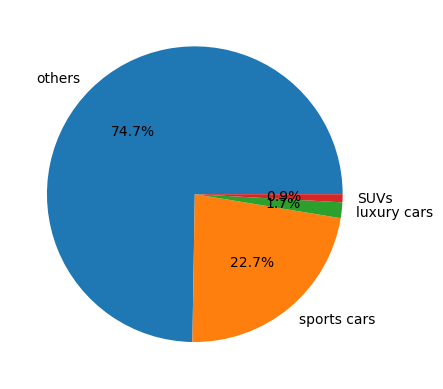

In [25]:
plt.pie(x=new_data['Vehicle_brand'].value_counts(), labels=pd.unique(new_data['Vehicle_brand']), autopct='%.1f%%')
plt.show()

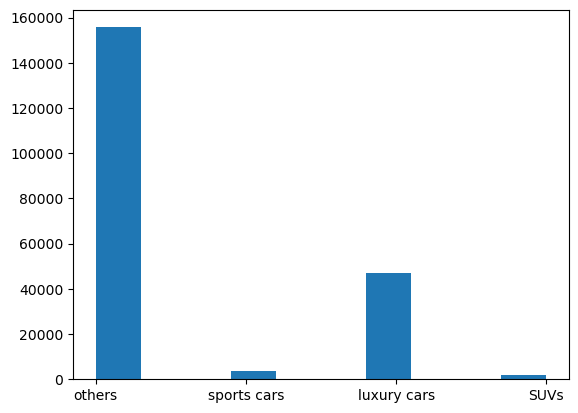

In [26]:
plt.hist(new_data['Vehicle_brand'])
plt.show()

creating a new dataframe for ploting 

In [27]:
plot_df = new_data.dropna()

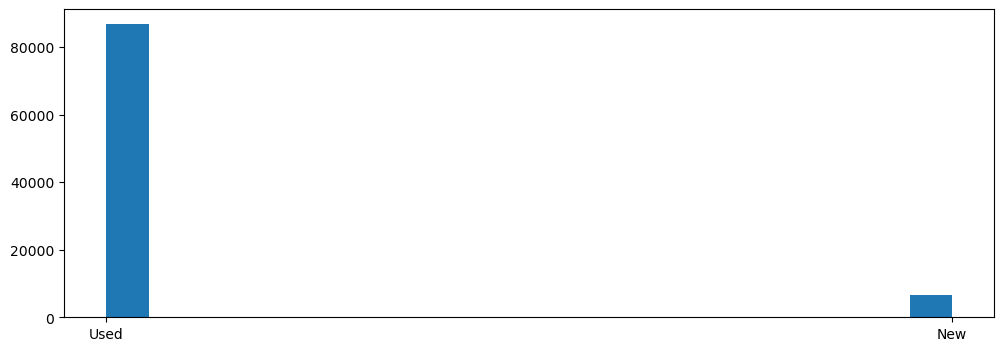

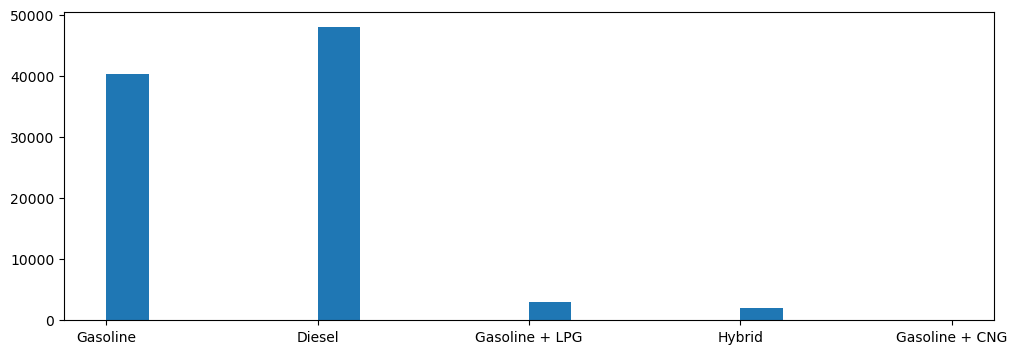

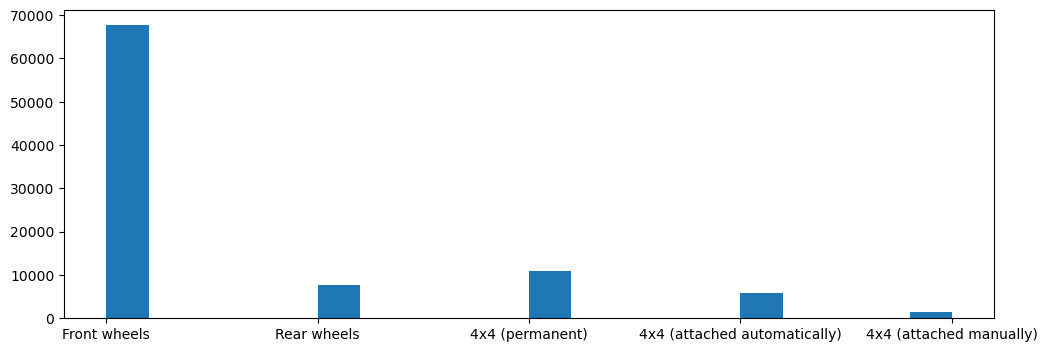

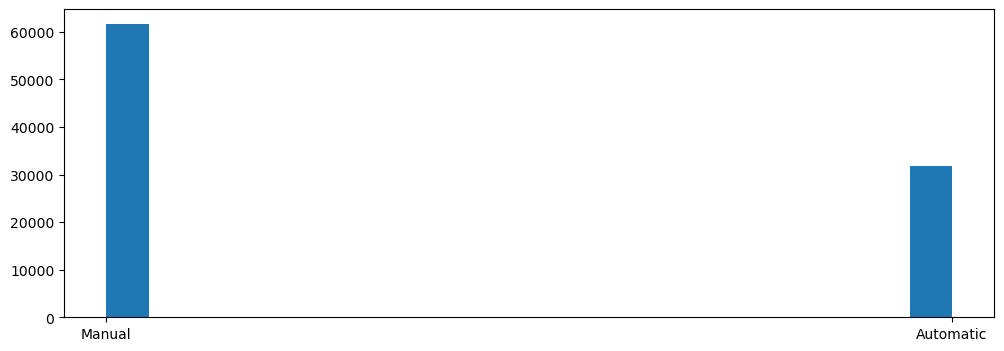

In [28]:
cols = ['Condition', 'Fuel_type', 'Drive', 'Transmission']
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 11))
# ax = ax.ravel()
for col in cols:
    plt.figure(figsize=(12, 4))
    plt.hist(x= plot_df[col], bins=20)
    plt.show()
#     sns.boxplot(data=cars_data, x=col, ax=ax[i], estimator = cars_data.mean)

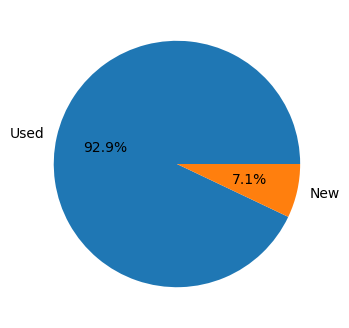

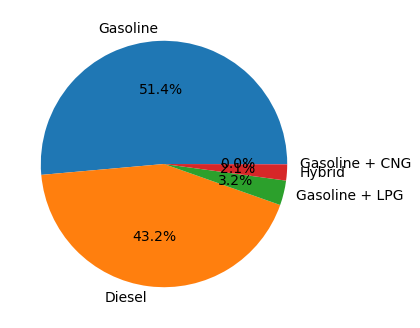

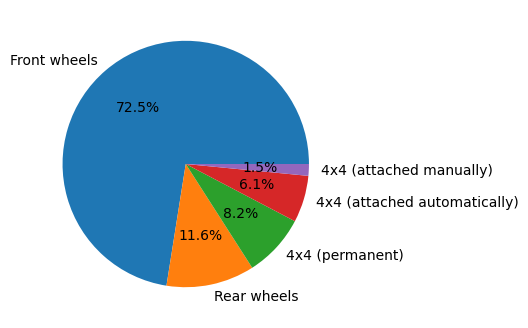

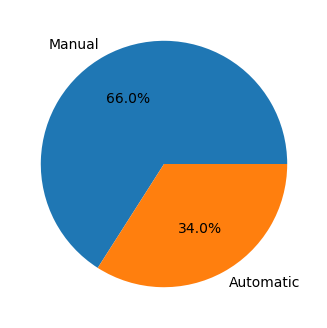

In [29]:
cols = ['Condition', 'Fuel_type', 'Drive', 'Transmission']
for col in cols:
    plt.figure(figsize=(12, 4))
    plt.pie(x=plot_df[col].value_counts(), labels=pd.unique(plot_df[col]), autopct='%.1f%%')
    plt.show()

# Now its time to dig deep numerical columns

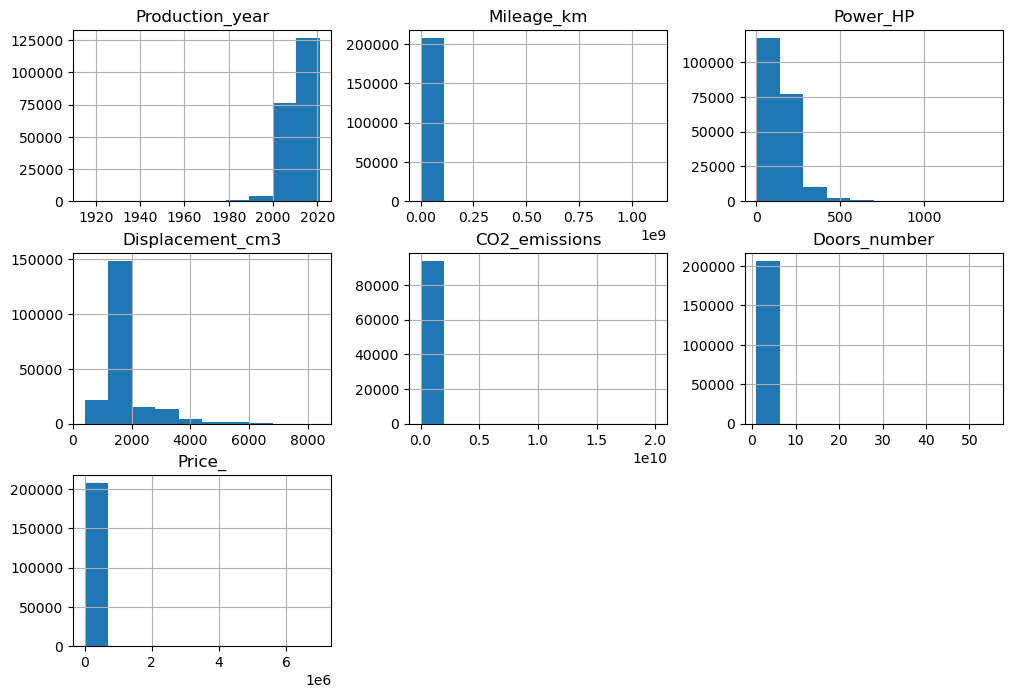

In [30]:
new_data.hist(figsize=(12, 8))
plt.show()

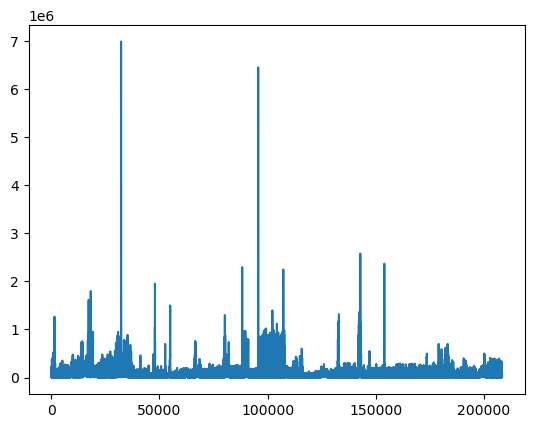

In [31]:
plt.plot(new_data['Price_'])
plt.show()

In [32]:
new_data['Price_'].describe().T

count    2.083040e+05
mean     6.330202e+04
std      8.874514e+04
min      5.850000e+02
25%      1.780000e+04
50%      3.580000e+04
75%      7.600000e+04
max      6.999000e+06
Name: Price_, dtype: float64

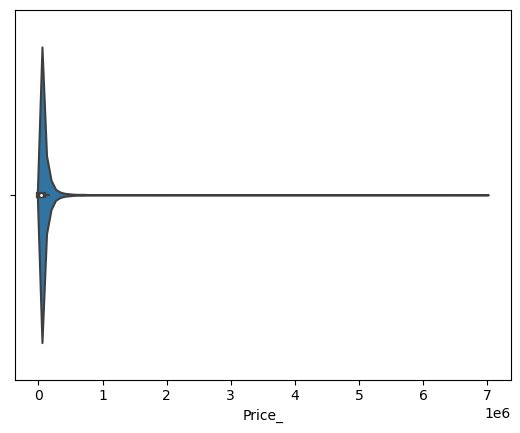

In [33]:
sns.violinplot(data=new_data, x = 'Price_')
plt.show()

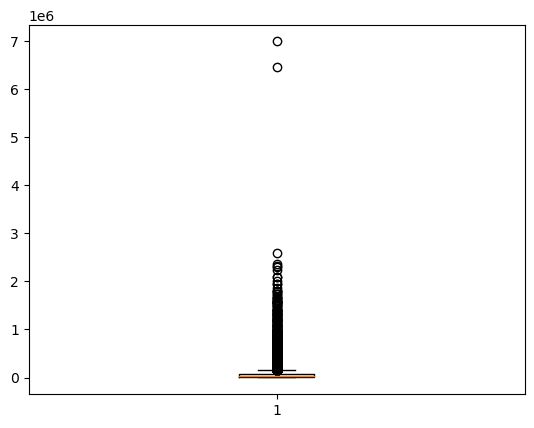

In [34]:
plt.boxplot(new_data['Price_'])
plt.show()

detecting outliers and removing them

In [35]:
np.std(new_data['Price_'])

88744.93113590893

In [36]:
np.quantile(new_data['Price_'], (0.25, 0.75))

array([17800., 76000.])

In [37]:
np.percentile(new_data['Price_'], (10, 90))

array([  9800. , 144245.2])

removing data between quartiles by using IQR

In [38]:
new = new_data.loc[(new_data['Price_'] >= 17800) & (new_data['Price_'] <= 76000)]

In [39]:
new

,Condition,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Price_
1,Used,others,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,43500.0
2,Used,others,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,44900.0
3,Used,others,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,39900.0
5,Used,others,2016,46060.0,180.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,62950.0
6,Used,others,2021,2900.0,145.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,2.0,69900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208287,Used,others,1964,47109.0,75.0,2400.0,Gasoline,NaN,Rear wheels,Manual,sedan,5.0,19900.0
208293,Used,others,2020,500000000.0,333.0,3333.0,Ethanol,NaN,NaN,Manual,small_cars,4.0,33333.0
208297,Used,others,1981,18712.0,55.0,1116.0,Gasoline,NaN,NaN,Manual,compact,4.0,19900.0
208298,Used,others,1978,6000.0,NaN,750.0,Gasoline,NaN,NaN,Manual,small_cars,2.0,26000.0


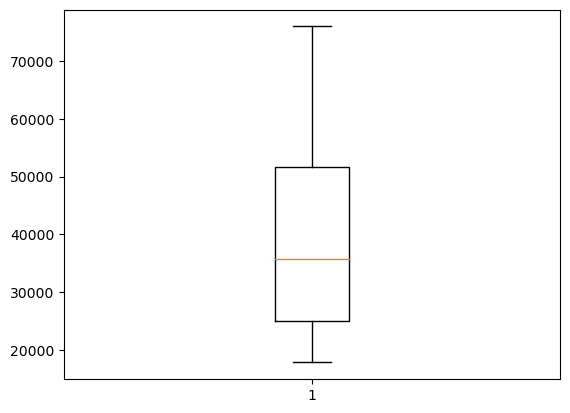

In [40]:
plt.boxplot(new['Price_'])
plt.show()

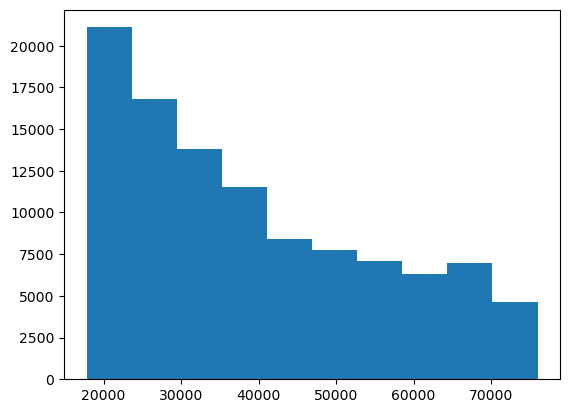

In [41]:
plt.hist(new['Price_'])
plt.show()

althouh it is still skewed to the right but way better then previous one. This hist and above mentioned boxplot clearly shows that transformed data is more dispersed

In [42]:
np.std(new['Price_'])

16451.824159236352

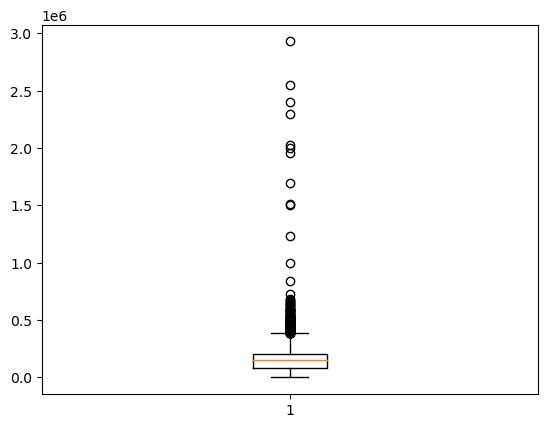

In [43]:
plt.boxplot(plot_df['Mileage_km'])
plt.show()

In [44]:
np.quantile(plot_df['Mileage_km'], (0.15, 0.80))

array([ 40817.55, 219000.  ])

In [45]:
new = new.loc[(new['Mileage_km'] >= 40817) & (new['Mileage_km'] <= 219000) ]

In [46]:
new

,Condition,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Price_
1,Used,others,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,43500.0
2,Used,others,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,44900.0
5,Used,others,2016,46060.0,180.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,62950.0
11,Used,others,2010,179000.0,210.0,1368.0,Gasoline,NaN,Front wheels,Manual,city_cars,3.0,31900.0
13,Used,others,2015,117000.0,140.0,1400.0,Gasoline,NaN,Front wheels,Manual,city_cars,3.0,38500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208281,Used,others,1960,96000.0,38.0,900.0,Gasoline,NaN,Front wheels,Manual,sedan,4.0,55125.0
208283,Used,others,1982,98600.0,100.0,2445.0,Gasoline,NaN,Front wheels,Manual,sedan,4.0,19900.0
208284,Used,others,1983,190000.0,105.0,2445.0,Gasoline,NaN,Rear wheels,Manual,sedan,4.0,27000.0
208285,Used,others,1982,83000.0,95.0,2445.0,Gasoline,NaN,NaN,Manual,sedan,4.0,27100.0


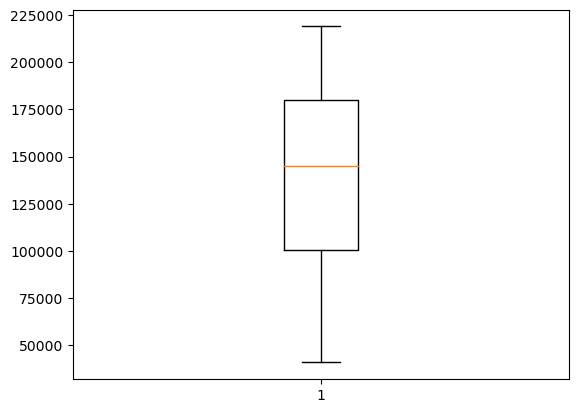

In [47]:
plt.boxplot(new['Mileage_km'])
plt.show()

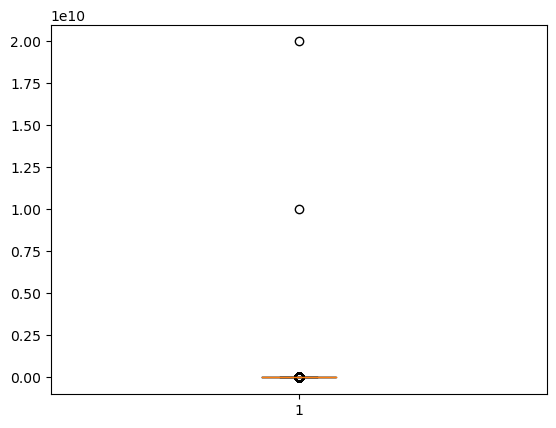

In [48]:
plt.boxplot(plot_df['CO2_emissions'])
plt.show()

It is too good to get rid off it

In [49]:
new.drop('CO2_emissions', axis=1, inplace=True)

In [50]:
new.isna().sum()

Condition              0
Vehicle_brand          0
Production_year        0
Mileage_km             0
Power_HP             192
Displacement_cm3     269
Fuel_type              0
Drive               4806
Transmission         147
Type                   0
Doors_number         405
Price_                 0
dtype: int64

In [51]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71665 entries, 1 to 208287
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Condition         71665 non-null  object 
 1   Vehicle_brand     71665 non-null  object 
 2   Production_year   71665 non-null  int64  
 3   Mileage_km        71665 non-null  float64
 4   Power_HP          71473 non-null  float64
 5   Displacement_cm3  71396 non-null  float64
 6   Fuel_type         71665 non-null  object 
 7   Drive             66859 non-null  object 
 8   Transmission      71518 non-null  object 
 9   Type              71665 non-null  object 
 10  Doors_number      71260 non-null  float64
 11  Price_            71665 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 7.1+ MB


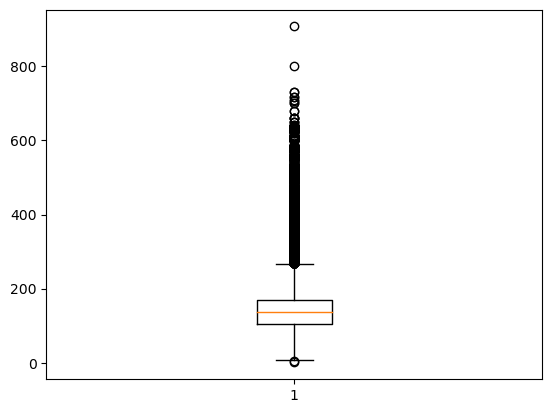

In [52]:
plt.boxplot(plot_df['Power_HP'])
plt.show()

same as CO2_emissions column

In [53]:
new.drop('Power_HP', axis=1, inplace=True)

In [54]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
Production_year,71665.0,2012.414121,5.111360,1922.0,2010.0,2013.0,2016.0,2020.0
Mileage_km,71665.0,139316.170962,48184.513735,40828.0,100214.0,144860.0,180000.0,219000.0
Displacement_cm3,71396.0,1806.723178,613.909968,400.0,1496.0,1600.0,1995.0,8200.0
Doors_number,71260.0,4.699832,0.726179,2.0,5.0,5.0,5.0,55.0
Price_,71665.0,38854.420443,15765.689737,17800.0,25500.0,35899.0,49900.0,76000.0


In [55]:
new = new.loc[new['Doors_number'] >= 2]

In [56]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
Production_year,71260.0,2012.421232,5.088673,1922.0,2010.00,2013.0,2016.0,2020.0
Mileage_km,71260.0,139322.145102,48182.945049,40828.0,100250.75,144817.0,180000.0,219000.0
Displacement_cm3,71078.0,1806.074735,613.214301,400.0,1496.00,1600.0,1995.0,8200.0
Doors_number,71260.0,4.699832,0.726179,2.0,5.00,5.0,5.0,55.0
Price_,71260.0,38848.656737,15762.095332,17800.0,25500.00,35833.5,49900.0,76000.0


now data processing part is almost complete

# Getting data ready for model training

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

seperating columns based on object types

In [58]:
num_cols = [cname for cname, content in new.items() if pd.api.types.is_numeric_dtype(content)]
num_cols

['Production_year', 'Mileage_km', 'Displacement_cm3', 'Doors_number', 'Price_']

Some Object columns have relationship among itselfs so it is good approach to encode them either in HOT or Ordial

In [59]:
new.select_dtypes(include='object')

,Condition,Vehicle_brand,Fuel_type,Drive,Transmission,Type
1,Used,others,Gasoline,Front wheels,Manual,coupe
2,Used,others,Gasoline,NaN,Automatic,small_cars
5,Used,others,Gasoline,Front wheels,Manual,small_cars
11,Used,others,Gasoline,Front wheels,Manual,city_cars
13,Used,others,Gasoline,Front wheels,Manual,city_cars
...,...,...,...,...,...,...
208281,Used,others,Gasoline,Front wheels,Manual,sedan
208283,Used,others,Gasoline,Front wheels,Manual,sedan
208284,Used,others,Gasoline,Rear wheels,Manual,sedan
208285,Used,others,Gasoline,NaN,Manual,sedan


In [60]:
hot_cols = ['Condition', 'Transmission', 'Fuel_type']
ord_cols = ['Vehicle_brand', 'Drive', 'Type']

creating pipelines

In [61]:
num_pipe = make_pipeline(SimpleImputer(strategy='median'))
hot_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
ord_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OrdinalEncoder())
processed = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('hot', hot_pipe, hot_cols),
    ('ord', ord_pipe, ord_cols),
])
processed.set_output(transform='pandas')
processed_df = processed.fit_transform(new)

In [62]:
processed_df

,num__Production_year,num__Mileage_km,num__Displacement_cm3,num__Doors_number,num__Price_,hot__Condition_Used,hot__Transmission_Automatic,hot__Transmission_Manual,hot__Fuel_type_Diesel,hot__Fuel_type_Electric,hot__Fuel_type_Gasoline,hot__Fuel_type_Gasoline + CNG,hot__Fuel_type_Gasoline + LPG,hot__Fuel_type_Hybrid,ord__Vehicle_brand,ord__Drive,ord__Type
1,1974.0,59000.0,1100.0,2.0,43500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0
2,2018.0,52000.0,1368.0,3.0,44900.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,7.0
5,2016.0,46060.0,1368.0,3.0,62950.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,7.0
11,2010.0,179000.0,1368.0,3.0,31900.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0
13,2015.0,117000.0,1400.0,3.0,38500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208281,1960.0,96000.0,900.0,4.0,55125.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,6.0
208283,1982.0,98600.0,2445.0,4.0,19900.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,6.0
208284,1983.0,190000.0,2445.0,4.0,27000.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,6.0
208285,1982.0,83000.0,2445.0,4.0,27100.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,6.0


In [63]:
processed_df.isna().sum()

num__Production_year             0
num__Mileage_km                  0
num__Displacement_cm3            0
num__Doors_number                0
num__Price_                      0
hot__Condition_Used              0
hot__Transmission_Automatic      0
hot__Transmission_Manual         0
hot__Fuel_type_Diesel            0
hot__Fuel_type_Electric          0
hot__Fuel_type_Gasoline          0
hot__Fuel_type_Gasoline + CNG    0
hot__Fuel_type_Gasoline + LPG    0
hot__Fuel_type_Hybrid            0
ord__Vehicle_brand               0
ord__Drive                       0
ord__Type                        0
dtype: int64

Spliting data into traing and testing

In [64]:
X = processed_df.drop('num__Price_', axis=1)
y = processed_df['num__Price_']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state=42)

# Traing a model

In [66]:
%%time
rand_model = RandomForestRegressor()
rand_model.fit(X_train, y_train)

CPU times: total: 24.7 s
Wall time: 25 s


RandomForestRegressor()

In [67]:
rand_model.score(X_train, y_train)

0.9611058370755563

In [68]:
predicts = rand_model.predict(X_test)

In [69]:
r2_score(y_test, predicts)

0.7539548995860781

In [70]:
mean_squared_error(y_test, predicts, squared=False)

7832.259738773674

In [71]:
rand_model.feature_importances_

array([3.74451717e-01, 1.39852270e-01, 2.32961197e-01, 1.50604286e-02,
       0.00000000e+00, 4.77271745e-02, 3.13007653e-02, 7.23178932e-03,
       7.11158140e-05, 1.51559844e-02, 4.62343801e-05, 1.89682167e-03,
       1.18778089e-03, 4.04027501e-02, 1.74357659e-02, 7.52182043e-02])

In [72]:
corr = new.corr()
corr

,Production_year,Mileage_km,Displacement_cm3,Doors_number,Price_
Production_year,1.000000,-0.264078,-0.369691,0.302831,0.352128
Mileage_km,-0.264078,1.000000,0.212645,0.023999,-0.272404
Displacement_cm3,-0.369691,0.212645,1.000000,-0.249551,0.253871
Doors_number,0.302831,0.023999,-0.249551,1.000000,0.005931
Price_,0.352128,-0.272404,0.253871,0.005931,1.000000


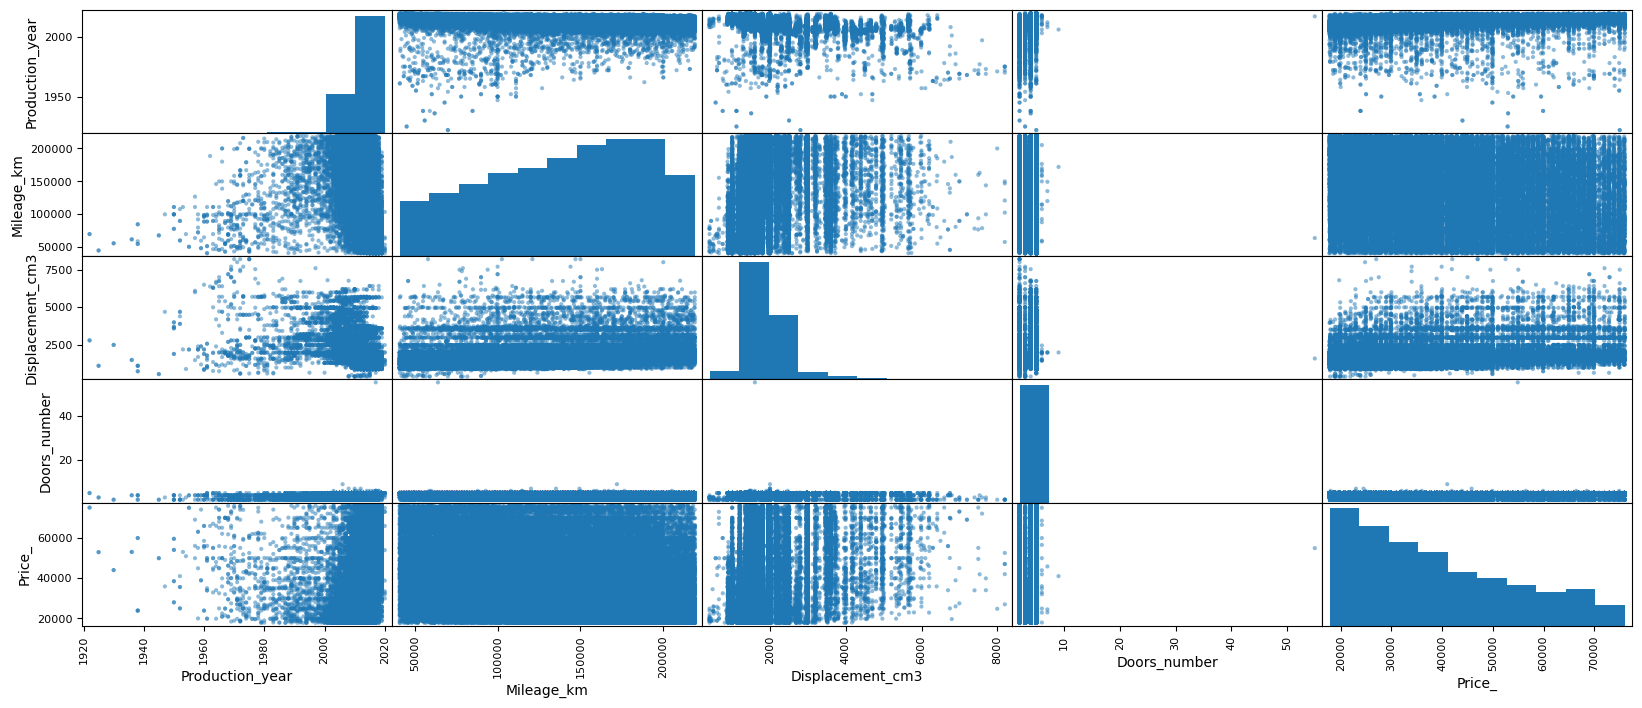

In [73]:
from pandas.plotting import scatter_matrix
scatter_matrix(frame=new, figsize=(20, 8))
plt.show()

now set hyperparameters by using Grid Search, because data is not too large

In [74]:
from sklearn.model_selection import GridSearchCV

In [151]:
param = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_depth' : [1, 3, 5],
        'min_samples_split' : [2, 4, 6, 8],
        'max_features' : ['auto', 'sqrt', 'log2'],
         'bootstrap' : [True, False],
        }
grid_ser = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), param_grid=param)
grid_ser.fit(X_train, y_train)

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\WNasir\Desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [152]:
grid_ser.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 80}

In [75]:
ideal = RandomForestRegressor(n_estimators=80, max_depth=5, max_features='auto', min_samples_split=2, bootstrap=True,
                             n_jobs=-1, random_state=42)
ideal.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=42)

In [76]:
pred = ideal.predict(X_test)
pred

array([51693.75469945, 45765.03236222, 52473.93336489, ...,
       62184.58216824, 36651.4743255 , 23360.52938209])

In [77]:
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred, squared=False))
print(mean_absolute_percentage_error(y_test, pred))


0.6337695849405809
91309055.56887066
7346.341313070409
9555.577197054643
0.2059394540164137


In [78]:
ideal.feature_importances_

array([5.54582342e-01, 1.70498988e-03, 2.33423078e-01, 1.35928885e-04,
       0.00000000e+00, 4.91469098e-02, 6.17971905e-02, 3.40728464e-05,
       0.00000000e+00, 7.02921665e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.06175465e-02, 2.19377242e-03, 4.93349527e-02])

In [79]:
def feature_imp(columns, importance):
    df = (pd.DataFrame({'features': columns,
                       'importance': importance}).sort_values("importance", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    plot = ax.barh(df['features'], df['importance'])
    ax.set_ylabel('features')
    ax.set_xlabel('importance')
    ax.invert_yaxis()

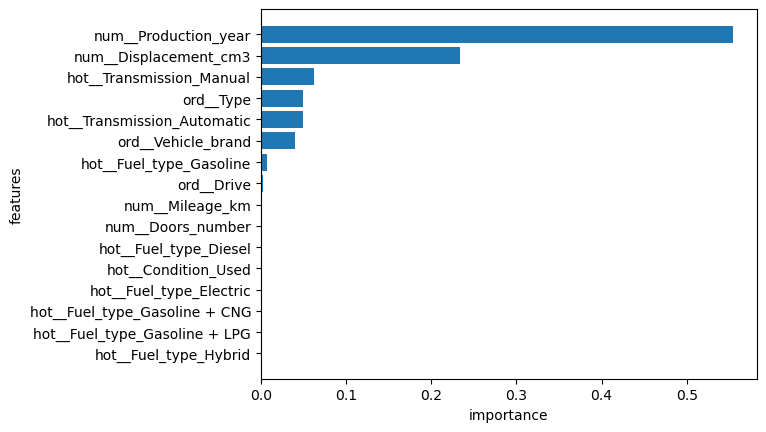

In [80]:
feature_imp(X_train.columns, ideal.feature_importances_)

In [81]:
ideal_df = processed_df.drop(['ord__Drive', 'num__Mileage_km', 'num__Doors_number', 'hot__Condition_Used'], axis=1)

In [82]:
ideal_df.columns

Index(['num__Production_year', 'num__Displacement_cm3', 'num__Price_',
       'hot__Transmission_Automatic', 'hot__Transmission_Manual',
       'hot__Fuel_type_Diesel', 'hot__Fuel_type_Electric',
       'hot__Fuel_type_Gasoline', 'hot__Fuel_type_Gasoline + CNG',
       'hot__Fuel_type_Gasoline + LPG', 'hot__Fuel_type_Hybrid',
       'ord__Vehicle_brand', 'ord__Type'],
      dtype='object')

In [83]:
X, y = ideal_df.drop('num__Price_', axis=1), ideal_df['num__Price_']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
ideal_model = RandomForestRegressor(n_estimators=80, max_depth=5, max_features='auto', min_samples_split=2, bootstrap=True,
                             n_jobs=-1, random_state=42)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=80,
                      n_jobs=-1, random_state=42)

In [86]:
pred1 = ideal_model.predict(X_test)

In [87]:
print(r2_score(y_test, pred1))
print(mean_squared_error(y_test, pred1))
print(mean_absolute_error(y_test, pred1))
print(mean_squared_error(y_test, pred1, squared=False))
print(mean_absolute_percentage_error(y_test, pred1))

0.6321655559588614
91708974.21408243
7364.086867378742
9576.48026229274
0.2062350061253524


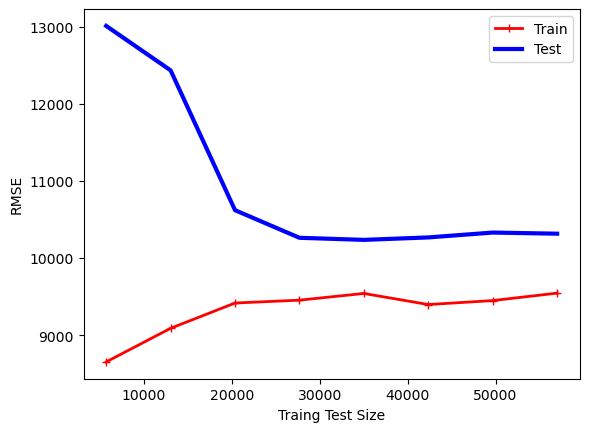

In [88]:
train_sizes, train_scores, test_scores = learning_curve(ideal_model, X, y, train_sizes=np.linspace(0.1, 1.0, 8), cv=5, scoring="neg_root_mean_squared_error")
train_error = -train_scores.mean(axis=1)
test_error = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_error, 'r-+', linewidth=2, label='Train')
plt.plot(train_sizes, test_error, 'b-', linewidth=3, label='Test')
plt.xlabel("Traing Test Size")
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [89]:
from joblib import dump
dump(ideal_model, 'Car_sales_price_predictor.joblib')

['Car_sales_price_predictor.joblib']